# Introduction to Project Tools

This notebook provides an introduction to the tools used in this project. Covers: data loading with DVC, data exploration with Pandas, data visualization with Matplotlib and Seaborn, and graph analysis with NetworkX.

## 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from IPython.display import display

sns.set_style('whitegrid')


## 2. Data Loading with DVC

We use [DVC](https://dvc.org/) to manage our datasets. To get the data, run the following command in your terminal:

```bash
dvc pull
```

This will download the datasets into the `notebooks/datasets` directory.

## 3. Data Exploration with Pandas

In [2]:
movies_df = pd.read_csv('datasets/movies/movies.csv')
ratings_df = pd.read_csv('datasets/movies/ratings.csv')

print('Movies Dataset:')
display(movies_df.head())

print('Ratings Dataset:')
display(ratings_df.head())


Movies Dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Ratings Dataset:


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


## 4. Data Visualization with Matplotlib/Seaborn

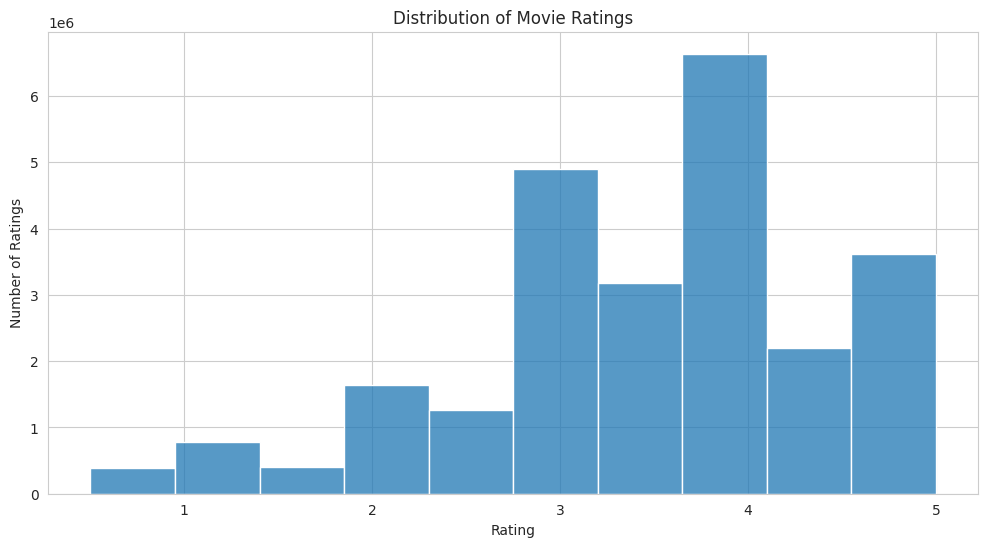

In [3]:
plt.figure(figsize=(12, 6))
sns.histplot(ratings_df['rating'], bins=10, kde=False)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.show()


## 5. Graph Creation with NetworkX

Drawing graph for: Forrest Gump (1994), Misérables, Les (1995), Hans Christian Andersen (1952)


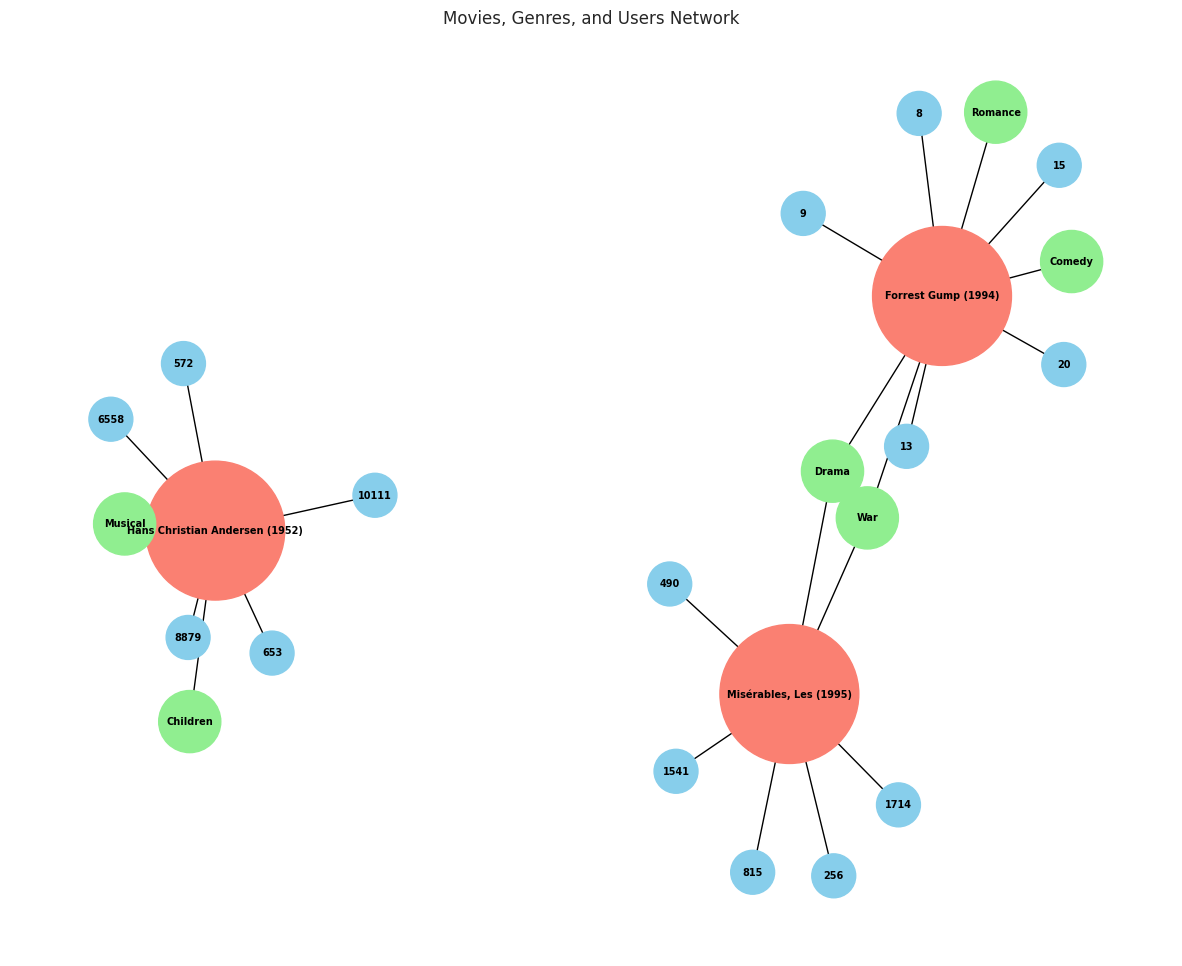

In [4]:
def draw_movie_user_genre_graph(ratings_df, movies_df, movie_titles_list, num_users_per_movie=5):    
    G = nx.Graph()
    all_genres = set()
    all_users = set()
    movie_genre_edges = []
    user_movie_edges = []
    
    for title in movie_titles_list:
        try:
            movie_row = movies_df[movies_df['title'] == title].iloc[0]
        except IndexError:
            print(f"Warning: Movie '{title}' not found. Skipping.")
            continue
            
        movie_id = int(movie_row['movieId'])
        
        G.add_node(title, type='movie')
        
        movie_genres = movie_row['genres'].split('|')
        for genre in movie_genres:
            all_genres.add(genre)
            movie_genre_edges.append((title, genre))

        high_raters_df = ratings_df[
            (ratings_df['movieId'] == movie_id) &
            (ratings_df['rating'] == 5.0)
        ]
        
        user_ids_to_show = high_raters_df['userId'].head(num_users_per_movie).tolist()
        
        for uid in user_ids_to_show:
            user_node = str(uid) 
            all_users.add(user_node)
            user_movie_edges.append((user_node, title))

    G.add_nodes_from(list(all_genres), type='genre')
    G.add_nodes_from(list(all_users), type='user')
    
    G.add_edges_from(movie_genre_edges)
    G.add_edges_from(user_movie_edges)

    plt.figure(figsize=(15, 12))
    
    color_map = []
    size_map = []
    for node in G:
        node_type = G.nodes[node]['type']
        if node_type == 'movie':
            color_map.append('salmon')
            size_map.append(10000) 
        elif node_type == 'genre':
            color_map.append('lightgreen')
            size_map.append(2000)  
        else:
            color_map.append('skyblue')
            size_map.append(1000)  
            
    pos = nx.spring_layout(G, k=0.4, iterations=50, seed=42)
    
    nx.draw_networkx(
        G,
        pos,
        node_color=color_map,
        node_size=size_map, 
        font_size=7,
        with_labels=True,
        width=1.0,
        font_weight='bold'
    )
    plt.title("Movies, Genres, and Users Network")
    plt.axis('off')
    plt.show()

movies_to_plot = [
    "Forrest Gump (1994)",
    "Misérables, Les (1995)",
    "Hans Christian Andersen (1952)"
]

print(f"Drawing graph for: {', '.join(movies_to_plot)}")
draw_movie_user_genre_graph(ratings_df, movies_df, movies_to_plot, num_users_per_movie=5)
